In [3]:
!pip install keras

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     --------------- ---------------------- 20.5/48.7 kB 320.0 kB/s eta 0:00:01
     --------------- ---------------------- 20.5/48.7 kB 320.0 kB/s eta 0:00:01
     ------------------------------- ------ 41.0/48.7 kB 279.3 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 272.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.2 MB 1.9 MB/s eta 0:00:01
   ---- ----------------------------------- 0.1/1.2 MB 1.6 MB/s eta 0:00:01
   ---- ----------------------------------- 0.1/1.2 MB 1.6 MB/s eta 0:00:01
   ------- -------------------------------- 0.2/1.2 MB 1.1 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.2 MB 1.1 MB/s eta 0:00:01
   ------------ --------------

In [7]:
!pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.2 MB 1.3 MB/s eta 0:04:56
   ---------------------------------------- 0.1/390.2 MB 1.3 MB/s eta 0:04:56
   ---------------------------------------- 0.1/390.2 MB 595.3 kB/s eta 0:10:56
   ---------------------------------------- 0.2/390.2 MB 706.2 kB/s eta 0:09:13
   ---------------------------------------- 0.2/390.2 MB 737.3 kB/s eta 0:08:49
   ----------------------

In [16]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

In [40]:
dataset_path = 'LeapGestRecog/leapGestRecog'  
IMG_SIZE = 64

images = []
labels = []

for participant_folder in os.listdir(dataset_path):
    participant_path = os.path.join(dataset_path, participant_folder)
    
    if os.path.isdir(participant_path):
        for gesture_folder in os.listdir(participant_path):
            gesture_path = os.path.join(participant_path, gesture_folder)
            
            if os.path.isdir(gesture_path):
                for img_file in os.listdir(gesture_path):
                    img_path = os.path.join(gesture_path, img_file)
                    
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    
                    
                    if img is None:
                        continue
                    
                    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                    
                    images.append(img)
                    labels.append(gesture_folder)

images = np.array(images)
labels = np.array(labels)

print("Number of images:", images.shape[0])
print("Image shape:", images.shape[1:])
print("Number of labels:", labels.shape[0])

Number of images: 20000
Image shape: (64, 64)
Number of labels: 20000


In [42]:
# Encode labels to integers
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels)

# Normalize image data
images = images / 255.0
images = images.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # Reshape for CNN input

#S plit into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.35, random_state=42)

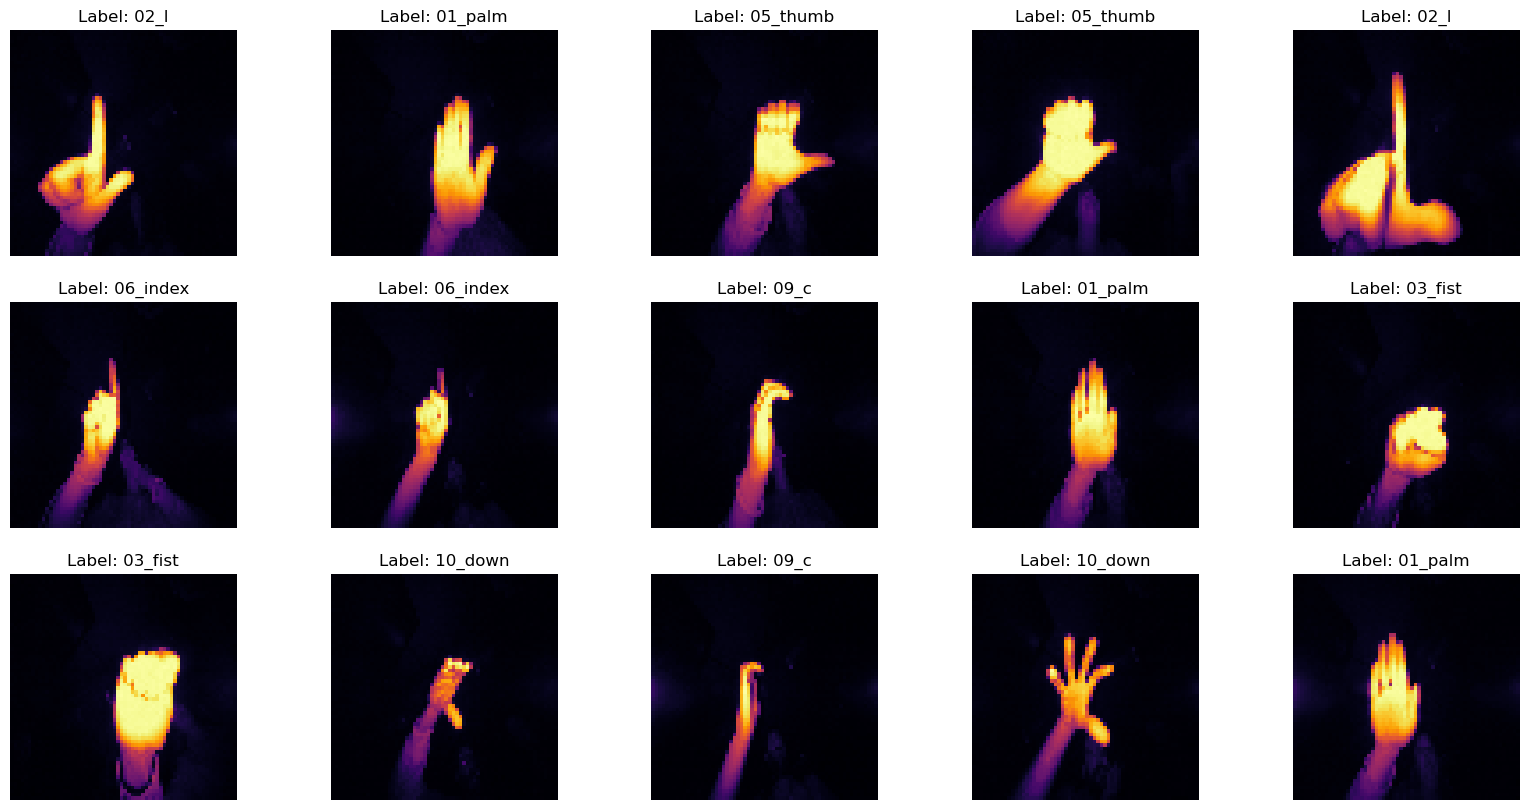

In [64]:
import matplotlib.pyplot as plt
import numpy as np

def display_sample_images(images, labels, label_encoder, num_images=15, IMG_SIZE=64):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(3, num_images // 3, i + 1)
        plt.imshow(images[i].reshape(IMG_SIZE, IMG_SIZE), cmap='inferno')
        plt.title(f"Label: {label_encoder.inverse_transform([np.argmax(labels[i])])[0]}")
        plt.axis('off')
    plt.show()

display_sample_images(X_train, y_train, label_encoder, num_images=15)

In [58]:

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(labels.shape[1], activation='softmax'))

model.summary()

C:\Users\Guapdad\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,914 (2.61 MB)

 Trainable params: 683,914 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 37s 76ms/step - accuracy: 0.6301 - loss: 1.0508 - val_accuracy: 0.9971 - val_loss: 0.0135
Epoch 2/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 29s 70ms/step - accuracy: 0.9851 - loss: 0.0497 - val_accuracy: 0.9996 - val_loss: 0.0030
Epoch 3/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 29s 71ms/step - accuracy: 0.9901 - loss: 0.0292 - val_accuracy: 0.9996 - val_loss: 0.0026
Epoch 4/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 29s 72ms/step - accuracy: 0.9903 - loss: 0.0278 - val_accuracy: 0.9996 - val_loss: 0.0017
Epoch 5/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 29s 71ms/step - accuracy: 0.9948 - loss: 0.0162 - val_accuracy: 0.9991 - val_loss: 0.0038
Epoch 6/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 29s 72ms/step - accuracy: 0.9956 - loss: 0.0149 - val_accuracy: 0.9999 - val_loss: 7.9865e-04
Epoch 7/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 28s 68ms/step - accuracy: 0.9969 - loss: 0.0101 - val_accuracy: 0.9991 - val_loss: 0.0023
Epoch 8/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 29s 72ms/step - accuracy: 0.9951 - loss: 0.015

In [66]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9999 - loss: 9.8849e-05
Test Accuracy: 99.99%
